In [1]:
import pandas as pd

In [2]:
# titanic 데이터셋 가져오기
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


|변수|정의|키
|------|---|---|
|Survived|생존 여부|0=No, 1=Yes|
|Pclass|등급(1등석.2등석,3등석)|1=1st, 2=2nd, 3=3rd
|Sex|성별| |
|Age|나이| |
|Sibsp|타이타닉에 탑승한 형재, 자매/배우자의 수| |
|Parch|타이타닉에 탑승한 부모님/자녀의 수| |
|Ticket|티켓 번호| |
|Fare|여객 운임(요금)| |
|Cabin|객실 번호| |
|Embarked|승선 항|C=Cherbourg, Q=Queenstown, S=Southamton|

df 데이터 정보 확인

In [3]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 데이터 시각화

In [4]:
import matplotlib.pyplot as plt
# %mtplotlib inline

def bar_chart(feature) :
    #특성 변수에 따른 생존 승객을 카운드
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    
    # 생존 승객과 사망 승객을 한눈에 보도록 데이터프레임으로 묶는다.
    df_tmp = pd.DataFrame([survived, dead])
    df_tmp.index = ['Survived', 'Dead']
    
    #막대 그래프로 표현
    df_tmp.plot(kind='bar', stacked=True, figsize=(10, 5))

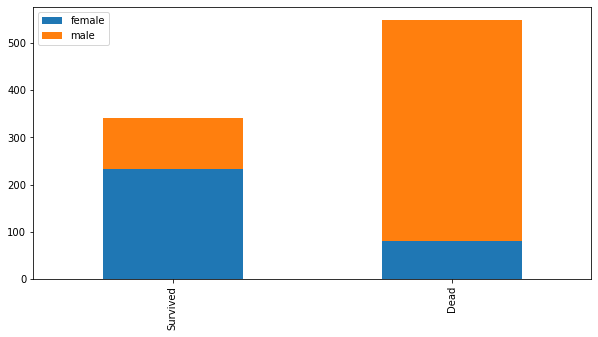

In [5]:
bar_chart('Sex') # 성별에 따른 생존 여부

막대 그래프를 통해서 보면 여자가 더 많이 살아남았고, 남자가 더 많이 죽었다.

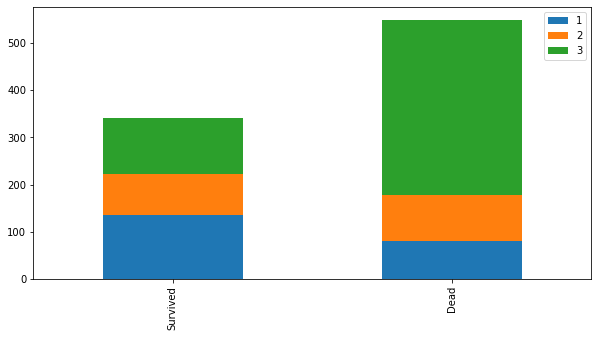

In [6]:
bar_chart('Pclass') # 등급에 따른 생존 여부

3등급 승객이 가장 많이 죽은 것을 확인 할 수 있다.

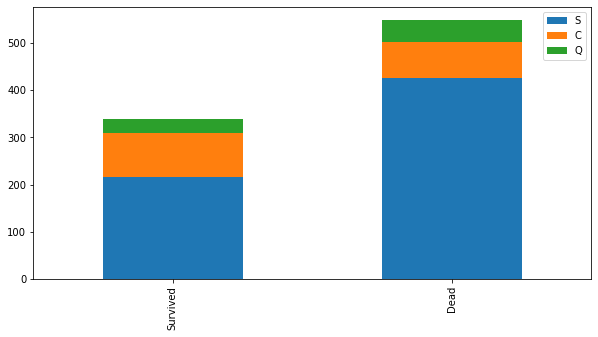

In [7]:
bar_chart('Embarked') # 승선한 곳에 따른 생존 여부

Southampton에서 승선한 승각이 가장 많이 죽었다.

하지만 이렇게 보면 정확한 비율을 모르기 때문에 범주형 데이터의 범주별 생존율을 구하고 싶다.

In [8]:
# 항목 별 비율을 알려주는 원그래프 함수를 작성
def pie_chart(feature) :
    # 특성에 속해있는 모든 범주들 카운트
    feature_ratio = df[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    # 특성에 따른 생존 승객 카운트
    survived = df[df['Survived'] == 1][feature].value_counts()
    # 특성에 따른 사망 승객 카운트
    dead = df[df['Survived'] == 0][feature].value_counts()
    
    # 해당 항목의 전체 비율을 알려주는 원그래프
    plt.plot(aspect='auto') # 축 x와 y 비율을 자동으로 설정
    # 특성 전체를 범주 별로 쪼개서, 퍼센트 비율을 소수점 두자리까지 보여줌
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.2f%%')
    plt.title(feature + '\'s ratio in total') # 그래프 제목 설정
    plt.show()
    
    # 해당 항목의 범주별 생존율을 알려주는 원그래프
    for i, index in enumerate(feature_index) :
        # 메인 그래프 밑에 조그맣게 볼 수 있도록 함
        plt.subplot(1, feature_size, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.2f%%')
        plt.title(str(index) + '\'s ratio')
        
    plt.show()

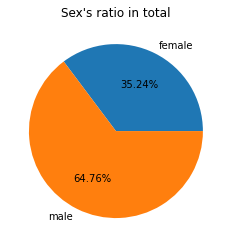

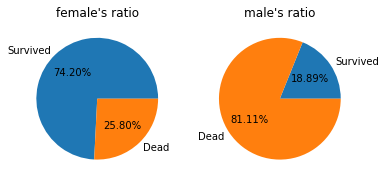

In [9]:
pie_chart('Sex')

남성과 여성의 비율은 각각 64.76%, 35.24%로 남성의 비율이 더 많았지만,

생존율을 비교해 보았을 때 남성의 생존율은 18.89%, 여성의 생존율은 74.20%로 여성의 생존율이 더 높다.

1등석, 2등석, 3등석 간의 생존율 파악

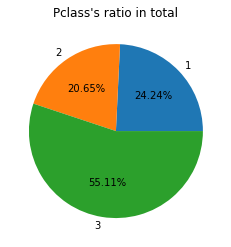

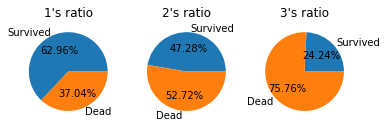

In [10]:
pie_chart('Pclass')

전체 등급의 비율은 3등석 승객의 비율이 55.11%로 가장 높다.

생존율은 1등석 승객이 62.96%로 가장 높고, 3등석 승객이 24.24%로 가장 낮다.

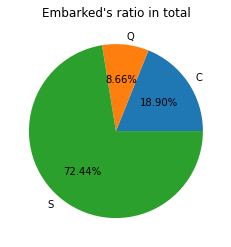

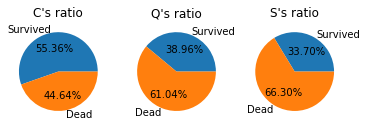

In [11]:
pie_chart('Embarked')

Southampton에서 승선한 승객의 비율이 72.44%로 가장 높고, Queenstwon에서 승선한 승객의 비율은 8.66%로 가장 낮다.

Cherbourg에서 승선한 승객의 생존율이 55.36%로 가장 높고, Southampton에서 승선한 승객의 생존율이 33.70%로 가장 낮다.

## 데이터 전처리

* 이름

Name에서 Mr, Miss 등 성별과 결혼 여부를 알 수 있는 타이틀을 추출하고 Name 항목은 삭제하려고 한다.

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


정규표현식을 이용하여 Mr, Mrs와 같은 타이틀을 추출한다.

In [13]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [14]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Lady          1
Sir           1
Countess      1
Don           1
Capt          1
Ms            1
Mme           1
Name: Title, dtype: int64

알고리즘이 텍스트를 읽을 수 없기 때문에 숫자형 데이터로 변환 시켜줘야 한다.
* Mr = 0
* Miss = 1
* Mrs = 2
* Others = 3

이렇게 설정을 해줄 것이다.

3은 Mr, Miss, Mrs를 제외한 모든 것이다.

In [15]:
title_conv = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3,
              "Rev":3, "Mlle":3, "Major":3, "Col":3, "Sir":3,
              "Lady":3, "Countess":3, "Jonkheer":3, "Don":3, 
              "Mme":3, "Ms":3, "Capt":3}

df['Title'] = df['Title'].map(title_conv)

잘 바뀌었는지 확인한다

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


잘 바뀌었으므로 Name 특성 삭제

In [17]:
df.drop('Name', axis=1, inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


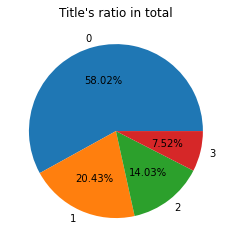

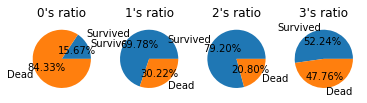

In [19]:
pie_chart('Title')

* 성별

마찬가지로 알고리즘이 알 수 있도록 숫자형 데이터로 변환.

* male = 0 (남)
* female = 1 (여)

In [20]:
sex_conv = {"male":0, "female":1}
df['Sex'] = df['Sex'].map(sex_conv)

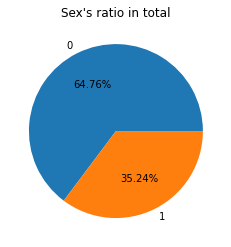

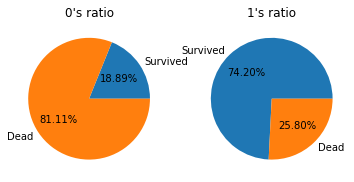

In [21]:
pie_chart('Sex')

남성 64.76%, 남성의 생존율 18.89%, 여성 35.24%, 여성의 생존율 74.20%

* 나이

나이에 누락된 값이 있기 때문에 누락된 값을 변환한다.

In [22]:
df['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

누락된 값을 평균값으로 변환하고

cut() 함수를 사용해서 구간을 나눌 것이다.

Binnig 기법을 사용한다.

여러 종류의 데이터에 대해 범위를 지정해주거나 카테고리를 통해 이전보다 작은 수의 그룹을 만드는 기법이다.

In [23]:
#누락된 값 평균값으로 대체
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'] = df['Age'].astype(int) # 정수형 타입으로 
df['AgeBand'] = pd.cut(df['Age'], 5) # 5개의 구간으로 나눔

# 나눠진 5구간과 각각의 생존율
print(df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


구간을 크게 5가지로 나누었다.

16세 이하 = 0

16세 초과 32세 이하 = 1

32세 초과 48세 이하 = 2

48세 초과 64세 이하 = 3

64세 초과 = 4

In [24]:
df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[df['Age'] > 64, 'Age'] = 4
df['Age'] = df['Age'].astype(int)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,"(16.0, 32.0]"
1,2,1,1,1,2,1,0,PC 17599,71.2833,C85,C,2,"(32.0, 48.0]"
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.0, 32.0]"
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2,"(32.0, 48.0]"
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0,"(32.0, 48.0]"


AgeBand를 삭제한다.

In [26]:
df.drop('AgeBand', axis=1, inplace=True)

Cabin과 Ticket 특성은 굳이 필요하지 않을 것으로 판단하여 삭제합니다.

In [27]:
df.drop('Cabin',axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,S,0
1,2,1,1,1,2,1,0,71.2833,C,2
2,3,1,3,1,1,0,0,7.9250,S,1
3,4,1,1,1,2,1,0,53.1000,S,2
4,5,0,3,0,2,0,0,8.0500,S,0


* 승선 항

Embarked 특성은 승객이 승선한 항에 대한 정보가 들어있다.

거주가 지역에 따라서도 생존율이 달라질 수 있으므로 어느 정도 유의미한 정보가 들어있다.

승선항과 등급 간의 관계를 알고 싶다.

In [29]:
Pclass1 = df[df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass']==3]['Embarked'].value_counts()

#Embarked 특성에 따라 Pclass의 등급이 어떻게 나뉘는지 카운트

<AxesSubplot:>

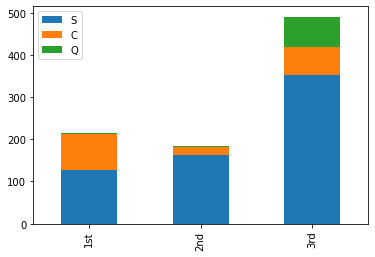

In [30]:
df1 = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df1.index = ['1st', '2nd', '3rd']
df1.plot(kind='bar', stacked=True)

Southampton에서 탑승한 승객이 압도적으로 많고, Queenstown에서 탑승한 승객은 대부분 3등석이다.

Southampton에서 탑승한 승객의 비율이 상대적으로 많이 높기 때문에 누락된 값을 Southampton을 뜻하는 S로 대체할 것이다.

In [31]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [32]:
df['Embarked'] = df['Embarked'].fillna('S')

In [33]:
df['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

그리고 수치형 데이터로 변환 시킨다.
* S = 0
* C = 1
* Q = 2

In [34]:
embarked_conv = {'S':0, 'C':1, 'Q':2}
df['Embarked'] = df['Embarked'].map(embarked_conv)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,0,0
1,2,1,1,1,2,1,0,71.2833,1,2
2,3,1,3,1,1,0,0,7.9250,0,1
3,4,1,1,1,2,1,0,53.1000,0,2
4,5,0,3,0,2,0,0,8.0500,0,0


* 여객 운임 (요금) => 현재 데이터에는 누락된 값이 없음(참고만 할 것)

Fare는 요금을 뜻한다. 구간을 정해서 등급을 나눌 것이다.

누락된 값이 하나 존재하는데, Pclass와 Fare가 어느 정도 연관 성이 있는 것 같아 Fare 데이터가 빠진 값의 Pclass를 가진 사람들의 평균 Fare 값을 넣는다.

In [36]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.026528,-0.057527,-0.001652,0.012658,-0.030467,-0.002555
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.044492,-0.035322,0.081629,0.257307,0.106811,0.445792
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.358005,0.083081,0.018443,-0.549500,0.045702,-0.164205
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.071125,0.114631,0.245489,0.182333,0.116569,0.557890
Age,0.026528,-0.044492,-0.358005,-0.071125,1.000000,-0.218846,-0.134014,0.124322,-0.051975,-0.087956
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.218846,1.000000,0.414838,0.159651,-0.059961,0.287060
Parch,-0.001652,0.081629,0.018443,0.245489,-0.134014,0.414838,1.000000,0.216225,-0.078665,0.341660
Fare,0.012658,0.257307,-0.549500,0.182333,0.124322,0.159651,0.216225,1.000000,0.062142,0.144773
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.051975,-0.059961,-0.078665,0.062142,1.000000,0.049699
Title,-0.002555,0.445792,-0.164205,0.557890,-0.087956,0.287060,0.341660,0.144773,0.049699,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 66.3 KB


In [38]:
# 누락된 값의 Pclass 보여주기
print(df[df['Fare'].isnull()]["Pclass"])

Series([], Name: Pclass, dtype: int64)


In [39]:
print(df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


3등급의 평균 요금은 약 13.7이다. 이 값을 누락된 값에 대체한다.

In [40]:
df['Fare'] = df['Fare'].fillna(13.7)

### 범위 설정을 어떻게 하지??

Age에서 한 과정을 그대로한다.

Binnig 기법으로 구간을 나눈다.

cut() 함수 사용

In [41]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [42]:
df['FareBand'] = pd.cut(df['Fare'], 5) # 4개의 구간으로 나눔

# 나눠진 5구간과 각각의 생존율
print(df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

             FareBand  Survived
0   (-0.512, 102.466]  0.361575
1  (102.466, 204.932]  0.757576
2  (204.932, 307.398]  0.647059
3  (307.398, 409.863]       NaN
4  (409.863, 512.329]  1.000000


In [43]:
df.loc[df['Fare'] <= 102.466, 'Fare'] = 0
df.loc[(df['Fare'] > 102.466) & (df['Fare'] <= 204.932), 'Fare'] = 1
df.loc[(df['Fare'] > 204.932) & (df['Fare'] <= 307.398), 'Fare'] = 2
df.loc[(df['Fare'] > 307.398) & (df['Fare'] <= 409.863), 'Fare'] = 2
df.loc[df['Fare'] > 409.863, 'Fare'] = 0

df['Fare'] = df['Fare'].astype(int)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
0,1,0,3,0,1,1,0,0,0,0,"(-0.512, 102.466]"
1,2,1,1,1,2,1,0,0,1,2,"(-0.512, 102.466]"
2,3,1,3,1,1,0,0,0,0,1,"(-0.512, 102.466]"
3,4,1,1,1,2,1,0,0,0,2,"(-0.512, 102.466]"
4,5,0,3,0,2,0,0,0,0,0,"(-0.512, 102.466]"


In [51]:
df.drop('FareBand', axis=1, inplace=True)

* 가족

이제 마지막으로
* SibSp : 형제,자매/배우자 수
* Parch : 부모님/자녀의 수

이 두 특성의 관계를 하나로 묶어서 하나의 특성으로 만들어 볼 것이다.

가족 수이기 때문에 자기 자신을 포함한다.

In [45]:
df['Family'] = df['SibSp'] + df['Parch'] + 1 # 1은 자기자신

In [47]:
df['Family'].max()

11

최대값이 11이고, 범위 구간을 좀 더 작게 정규화 시켜줄 것이다.

※ 정규화를 더 작게하는 이유가 있나??

In [49]:
family_conv = {1:0, 2:0.5, 3:1, 4:1.5, 5:2.0, 6:2.5,
              7:3.0, 8:3.5, 9:4, 10:4.5, 11:5}

df['Family'] = df['Family'].map(family_conv)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,0,1,1,0,0,0,0,0.5
1,2,1,1,1,2,1,0,0,1,2,0.5
2,3,1,3,1,1,0,0,0,0,1,0.0
3,4,1,1,1,2,1,0,0,0,2,0.5
4,5,0,3,0,2,0,0,0,0,0,0.0


마지막으로 합쳐진 특성 SibSp와 Parch는 삭제 하도록한다.

In [53]:
features_drop = ['SibSp', 'Parch']
df = df.drop(features_drop, axis=1)
df.set_index('PassengerId')

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
PassengerId,,,,,,,,
1,0,3,0,1,0,0,0,0.5
2,1,1,1,2,0,1,2,0.5
3,1,3,1,1,0,0,1,0.0
4,1,1,1,2,0,0,2,0.5
5,0,3,0,2,0,0,0,0.0
...,...,...,...,...,...,...,...,...
887,0,2,0,1,0,0,3,0.0
888,1,1,1,1,0,0,1,0.0
889,0,3,1,1,0,0,1,1.5


모든 전처리는 끝났다.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int32  
 5   Fare         891 non-null    int32  
 6   Embarked     891 non-null    int64  
 7   Title        891 non-null    int64  
 8   Family       891 non-null    float64
dtypes: float64(1), int32(2), int64(6)
memory usage: 55.8 KB
